In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [5]:
classLabels = []
file_name = 'labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [40]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 00000230052CAC10>

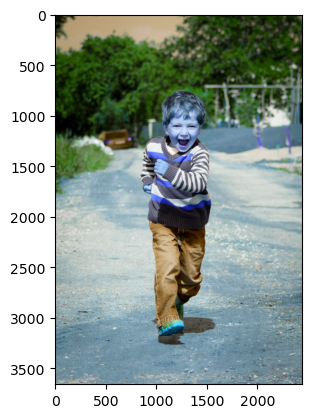

In [41]:
img = cv2.imread('boy.jpg')
plt.imshow(img)

In [42]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold= 0.5)

In [43]:
print(ClassIndex)

[1 1]


In [44]:
font_scale = 50
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255,0,0),2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale= font_scale, color = (0, 255,0), thickness=5)

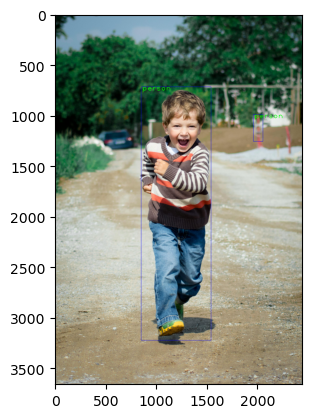

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [28]:
#Video

cap = cv2.VideoCapture('video.mp4')
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cant open the video')

font_scale = 5
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    if not ret:
        print("End of video stream or error reading frame.")
        break
    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold = 0.55)
    
    print(ClassIndex)
    
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if(ClassInd <= 80):
                # Convert boxes to integer for drawing
                int_boxes = boxes.astype(int)
                
                cv2.rectangle(frame, int_boxes, (255,0,0),2)
                
                # FINAL FIX: Place text securely INSIDE the top-left corner of the box
                text_position = (int_boxes[0] + 10, int_boxes[1] + 30)
                
                cv2.putText(frame, classLabels[ClassInd-1], text_position, font, fontScale=font_scale, color=(0, 255,0), thickness=4)

    
    display_width = 800
    display_height = 600
    resized_frame = cv2.resize(frame, (display_width, display_height))
    
    cv2.imshow('objdetection by Sai', resized_frame)
    
    if cv2.waitKey(2) & 0xff == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

[ 1 62 62  1]
[ 1 62  1 62]
[ 1 62 62  1]
[ 1 62  1 62]
[ 1  1 62 62]
[ 1  1 62 62]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1 62 62  1]
[ 1 62  1  1 62]
[ 1 62  1  1]
[ 1 62  1  1 62]
[ 1  1 62  1 62]
[ 1  1  1 62 62]
[ 1  1 62 62]
[ 1  1 62 62  1]
[ 1  1 62 62]
[ 1  1 62 62  1]
[ 1  1 62 62  1]
[ 1  1 62 62]
[ 1  1 62  1 62]
[ 1  1 62 62  1]
[ 1  1  1 62 62]
[ 1  1  1 62 62]
[ 1  1 62  1 62]
[ 1  1  1 62 62]
[ 1  1  1 62]
[ 1  1  1 62 62]
[ 1  1  1 62]
[ 1  1 62  1]
[ 1  1  1 62]
[1 1 1]
[ 1  1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[1 1]
[ 1  1 62]
[ 1  1 62 62]
[ 1  1  1 62]
[ 1  1 62  1]
[ 1  1 62]
[ 1  1 62 62]
[ 1  1  1 62]
[ 1  1 62  1]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62 62]
[ 1  1 62 62]
[ 1  1 62]
[ 1  1 62 62]
[ 1  1 62 62]
[ 1  1 62 62]
[ 1  1 62 62]
[ 1  1 62 62]
[ 1  1 62 62]
[ 1  1 62]
[ 1  1 62 62]
[ 1  1 62 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1 